<a href="https://colab.research.google.com/github/victor6711/ML_Project/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Domain – Social Media FOCUS – PREDICT NO. OF SHARES OF AN ARTICLE

Project -- Online News Popularity -- Case Study

In [1]:
from google.colab import files

In [ ]:
uploaded =files.upload()

Saving OnlineNewsPopularity.csv to OnlineNewsPopularity.csv


# Import Libraries

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import seaborn as sns
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

** Use pandas to read data as a dataframe called df.**

In [4]:
import io 

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
path=('/OnlineNewsPopularity.csv')
df=pd.read_csv(path)
df.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0,0,0,1,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [50]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448565,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

** Attribute information: <br> ** Number of Attributes: 61 including target column -- shares

Attribute Information: 
0. url: URL of the article 
1. timedelta: Days between the article publication and the dataset acquisition
2. n_tokens_title: Number of words in the title 
3. n_tokens_content: Number of words in the content 
4. n_unique_tokens: Rate of unique words in the content 
5. n_non_stop_words: Rate of non-stop words in the content 
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
7. num_hrefs: Number of links 
8. num_self_hrefs: Number of links to other articles published by Mashable 
9. num_imgs: Number of images 
10. num_videos: Number of videos 
11. average_token_length: Average length of the words in the content 
12. num_keywords: Number of keywords in the metadata 
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? 
14. data_channel_is_entertainment: Is data channel 'Entertainment'? 
15. data_channel_is_bus: Is data channel 'Business'? 
16. data_channel_is_socmed: Is data channel 'Social Media'? 
17. data_channel_is_tech: Is data channel 'Tech'? 
18. data_channel_is_world: Is data channel 'World'? 
19. kw_min_min: Worst keyword (min. shares) 
20. kw_max_min: Worst keyword (max. shares) 
21. kw_avg_min: Worst keyword (avg. shares) 
22. kw_min_max: Best keyword (min. shares) 
23. kw_max_max: Best keyword (max. shares) 
24. kw_avg_max: Best keyword (avg. shares) 
25. kw_min_avg: Avg. keyword (min. shares) 
26. kw_max_avg: Avg. keyword (max. shares) 
27. kw_avg_avg: Avg. keyword (avg. shares) 
28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
29. self_reference_max_shares: Max. shares of referenced articles in Mashable 
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable 
31. weekday_is_monday: Was the article published on a Monday? 
32. weekday_is_tuesday: Was the article published on a Tuesday? 
33. weekday_is_wednesday: Was the article published on a Wednesday? 
34. weekday_is_thursday: Was the article published on a Thursday? 
35. weekday_is_friday: Was the article published on a Friday? 
36. weekday_is_saturday: Was the article published on a Saturday? 
37. weekday_is_sunday: Was the article published on a Sunday? 
38. is_weekend: Was the article published on the weekend? 
39. LDA_00: Closeness to LDA topic 0 
40. LDA_01: Closeness to LDA topic 1 
41. LDA_02: Closeness to LDA topic 2 
42. LDA_03: Closeness to LDA topic 3 
43. LDA_04: Closeness to LDA topic 4 
44. global_subjectivity: Text subjectivity 
45. global_sentiment_polarity: Text sentiment polarity 
46. global_rate_positive_words: Rate of positive words in the content 
47. global_rate_negative_words: Rate of negative words in the content 
48. rate_positive_words: Rate of positive words among non-neutral tokens 
49. rate_negative_words: Rate of negative words among non-neutral tokens 
50. avg_positive_polarity: Avg. polarity of positive words 
51. min_positive_polarity: Min. polarity of positive words 
52. max_positive_polarity: Max. polarity of positive words 
53. avg_negative_polarity: Avg. polarity of negative words 
54. min_negative_polarity: Min. polarity of negative words 
55. max_negative_polarity: Max. polarity of negative words 
56. title_subjectivity: Title subjectivity 
57. title_sentiment_polarity: Title polarity 
58. abs_title_subjectivity: Absolute subjectivity level 
59. abs_title_sentiment_polarity: Absolute polarity level 
60. shares: Number of shares (target)

In [51]:
df.columns.values

array(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', ' data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positiv

In [52]:
df.isnull().any()

url                             False
timedelta                       False
n_tokens_title                  False
n_tokens_content                False
n_unique_tokens                 False
                                ...  
title_subjectivity              False
title_sentiment_polarity        False
abs_title_subjectivity          False
abs_title_sentiment_polarity    False
shares                          False
Length: 61, dtype: bool

# ** Q1. Looking at the data above what are your first thoughts about quality of data and modeling? **

In [53]:
df.drop(["url","timedelta"],axis = 1, inplace = True)
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448565,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306

#Correlation of Features
Lets find the correlation among features (very important for successfull modelling)

We will plot correlation matrix using Plotly HeatMap

In [55]:
data = [
    go.Heatmap(
        z= df.astype(float).corr().values,
        x=df.columns.values,
        y=df.columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Correlation of features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

ValueError: ignored

# Start Of Part 2 -- Apply various modeling techniques

Common imports for modeling

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [57]:
# To ensure output is same each time code is run
random_state = 101     

Function to split the data

In [58]:
def get_data(df_data,test_size=0.3):
    X = df_data.copy()
    X.drop("shares",axis=1, inplace=True,)
    y = df_data["shares"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X,y,X_train, X_test, y_train, y_test

Function to perform Simple Linear Regression

In [59]:
def perf_linear_regression(df_data,standscalar=False):
    X,y,X_train, X_test, y_train, y_test = get_data(df_data)
    if(standscalar):
        print ("Regression after applying StandardScaler")
        X_scaler = StandardScaler()
        X_train = X_scaler.fit_transform(X_train)
        X_test = X_scaler.transform(X_test)
        
#         y_scaler = StandardScaler()
# #         y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
# #         y_test = y_scaler.transform(y_test[:, None])[:, 0]
#         y_train = y_scaler.fit_transform(y_train)
#         y_test = y_scaler.transform(y_test)

       
     # End of If for StandardScaler  
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_pred = lm.predict(X_test)
    y_train_pred = lm.predict(X_train)
    print ("RMSE on Train Data is: {:.2f} :".format( np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))) )
    print ("RMSE on Test Data  is: {:.2f} :".format( np.sqrt(metrics.mean_squared_error(y_test, y_pred))) )
    return X,y,X_train, X_test, y_train, y_test

** Approach 1: Linear Regression **
** Q3: What is the RMSE on Test Data for Linear Regression? **

In [60]:
import numpy as np


In [61]:
X,y,X_train, X_test, y_train, y_test = perf_linear_regression(df)
print ("Median Value of Shares:", y.median())

RMSE on Train Data is: 12381.38 :
RMSE on Test Data  is: 1768161982.03 :
Median Value of Shares: 1400.0


** Q: 4. Challenge Why Linear Regression should be used here ?**

Linear Regression is a good starting point in case we need to predict continuous variables . On Speed vs. Accuracy balance � it scores on Speed. RMSE value from Linear Regression is a good indication that it is not sufficient

** Approach 2: Use Standard Scaler to scale the data **
StandardScaler removes the mean and scales the data to unit variance. Standardization of a dataset is a common requirement for many machine learning estimators

** Q5: Is the RMSE better than in Approach 1 (Linear Regression) in this case? If Not Why ? **

In [62]:
X,y,X_train, X_test, y_train, y_test = perf_linear_regression(df,True)

Regression after applying StandardScaler
RMSE on Train Data is: 12381.29 :
RMSE on Test Data  is: 1767801094.14 :


Lets do analysis of target value y and see if there are outliers and we can get rid of them

In [63]:
print ("\nPrinting shares count distribution data")
data = y.value_counts(ascending=False)
print (data)

## print (y.value_counts(ascending=False))

## print ("\nPrinting share count")
## print (y.sort_values(ascending=False) )


Printing shares count distribution data
1100      2308
1200      2018
1300      1740
1400      1592
1500      1323
          ... 
197600       1
310800       1
92           1
57800        1
82200        1
Name: shares, Length: 1454, dtype: int64


** Approach 3: Detect Outlier and remove them from data set **

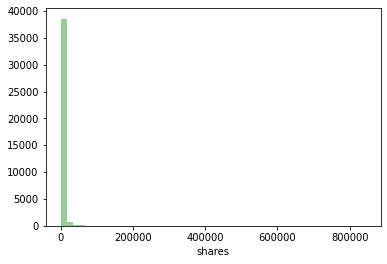

In [64]:
sns.distplot(y,kde=False,color="green");

In [65]:
data = [go.Bar(
            x=y.value_counts().index.values,
            # Use log of value_count to make graph more comprehendible 
            #y= np.log2(y.value_counts().values) 
            y= y.value_counts().values
    )]

py.iplot(data, filename='data-basic-bar',image_width=1200, image_height=1800)

** Q6: Which data -- based on shares count should be dropped from dataset ?**
You can use just vizual cue here , we will have more formal approach in Capstone

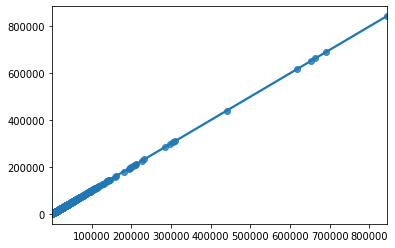

In [66]:
# # Lets get  a scatter plot of shares and respective counts
y_unique = y.unique()
sns.regplot(y_unique,y_unique,data=y,scatter=True)

Define a generic function to filter data

In [67]:
def filter_threshold_data(df_copy,threshold,column_name):
    df_adjusted = df_copy[df_copy[column_name] <= threshold]
    print (" Original Data Count:", len(df_copy))
    print (" After Adjusting Data Count:", len(df_adjusted))
    return df_adjusted

In [68]:
df_adjusted = filter_threshold_data(df,100000,"shares")

 Original Data Count: 39644
 After Adjusting Data Count: 39586


** Q7: What is RMSE for data filtered at 100,000 and 20,000? What inference can you draw?**

In [69]:
X,y,X_train, X_test, y_train, y_test = perf_linear_regression(df_adjusted)

RMSE on Train Data is: 5868.35 :
RMSE on Test Data  is: 5756.43 :


In [70]:
df_adjusted = filter_threshold_data(df,20000,"shares")
X,y,X_train, X_test, y_train, y_test = perf_linear_regression(df_adjusted)

 Original Data Count: 39644
 After Adjusting Data Count: 38826
RMSE on Train Data is: 2756.00 :
RMSE on Test Data  is: 2670.63 :


7.	RMSE  for filter 100,000 � 5756.43, RMSE for filter 20,000 � 2670.63 
Key Point is outliers skew the model hence it is important to drop them for dataset

** Approach 4: Lets try improve the model by using DecisionTreeRegressor for regression **

** Q8. Why we should use DecisionTree? **

Reasons for using Decision Tree

1. Decision trees implicitly perform variable screening or feature selection
2. Nonlinear relationships between parameters do not affect tree performance
3. It is easy to interpret

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
def decision_tree_regression(max_depth,X_train,y_train,X_test,y_test):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print ("Tree Max Depth is:", max_depth)
    print ("RMSE on Train Data is: {:.2f} :".format( np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))) )
    print ("RMSE on Test Data is: {:.2f} :".format( np.sqrt(metrics.mean_squared_error(y_test, y_pred))) )
    #print (model.decision_path)

    return

** Q9. For what max_depth you get least RMSE for Test Data? **

9. RMSE -- 2698.59 on test data is least at max_depth = 5

** Q10. Why RMSE increases after certain max_depth? Is this sign of overfitting?**

In [73]:
df_adjusted = filter_threshold_data(df,20000,"shares")
X,y,X_train, X_test, y_train, y_test = get_data(df_adjusted)
max_depth_count = len(X.columns)

depth_range = [1,2,5,10,15,20,25,30,35,40,max_depth_count]
print ("Starting Decision Tree Regression:")
for depth in depth_range:
    decision_tree_regression(depth,X_train,y_train,X_test,y_test)
    
# End of decision tree testing 

 Original Data Count: 39644
 After Adjusting Data Count: 38826
Starting Decision Tree Regression:
Tree Max Depth is: 1
RMSE on Train Data is: 2813.15 :
RMSE on Test Data is: 2720.21 :
Tree Max Depth is: 2
RMSE on Train Data is: 2793.18 :
RMSE on Test Data is: 2701.06 :
Tree Max Depth is: 5
RMSE on Train Data is: 2745.93 :
RMSE on Test Data is: 2698.59 :
Tree Max Depth is: 10
RMSE on Train Data is: 2443.16 :
RMSE on Test Data is: 2962.95 :
Tree Max Depth is: 15
RMSE on Train Data is: 1812.13 :
RMSE on Test Data is: 3471.15 :
Tree Max Depth is: 20
RMSE on Train Data is: 1031.13 :
RMSE on Test Data is: 3844.75 :
Tree Max Depth is: 25
RMSE on Train Data is: 486.06 :
RMSE on Test Data is: 4014.42 :
Tree Max Depth is: 30
RMSE on Train Data is: 167.46 :
RMSE on Test Data is: 3986.76 :
Tree Max Depth is: 35
RMSE on Train Data is: 58.94 :
RMSE on Test Data is: 4089.70 :
Tree Max Depth is: 40
RMSE on Train Data is: 11.71 :
RMSE on Test Data is: 4035.47 :
Tree Max Depth is: 58
RMSE on Train Data 

** Approach 5: Combining multiple techniques **
We will use the following

1. Use MinMaxScaler to Scale the Data
2. Use Principal Component Analysis to restrict the no. of dimensions
3. Use Ensemble technique AdaBoost With DecisionTreeRegressor to further improve the model

In [74]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor

** Q11. Why MinMaxScaler should be used ? **

The MinMaxScaler is the most famous scaling algorithm, and follows the following formula for each feature: xi�min(x)/(max(x)�min(x) )

It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values). This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

Applying MinMaxScaler

** Q12. While applying min max scaling to normalize your features, do you apply min max scaling on the entire dataset before splitting it into training, validation and test data? -- My Favourite Question **

In [75]:
df_adjusted = filter_threshold_data(df,20000,"shares")
X,y,X_train, X_test, y_train, y_test = get_data(df_adjusted,)
min_max_norm = MinMaxScaler()
X_train_norm = min_max_norm.fit_transform(X_train)
X_test_norm = min_max_norm.transform(X_test)

 Original Data Count: 39644
 After Adjusting Data Count: 38826


# Applying PCA -- Principal Component Analysis

** Q13. What is the significance of using PCA here ? **

Get the PCA for variance upto 95 % <br>
** Q14. How many features are there after variance is limited to 95% ?**




In [76]:
pca = PCA()
pca.fit(X_train_norm)
X_train_normreduced =  pd.DataFrame(pca.transform(X_train_norm))
X_train_normreduced = X_train_normreduced.loc[:,pca.explained_variance_ratio_.cumsum()<0.95]

In [77]:
print (X_train_normreduced.shape)

(27178, 22)


# We got 22 features for around 95 % variance. Lets use this info to do modeling further

In [78]:
pca = PCA(n_components=22)
df_adjusted = filter_threshold_data(df,20000,"shares")
X,y,X_train, X_test, y_train, y_test = get_data(df_adjusted,)
min_max_norm = MinMaxScaler()
X_train_norm = min_max_norm.fit_transform(X_train)
X_test_norm = min_max_norm.transform(X_test)

X_train_norm  = pca.fit_transform(X_train_norm)
X_test_norm = pca.transform(X_test_norm)
X_train_norm =  pd.DataFrame(X_train_norm)
X_test_norm = pd.DataFrame(X_test_norm)

 Original Data Count: 39644
 After Adjusting Data Count: 38826


In [79]:
# Transforming y . We can choose different log base also such as 2, 10 etc
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

** Q15. Why use AdaBoostRegressor ? **

Generic function to use AdaBoostRegression for different dataset and estimator values

In [80]:
def ada_boost_regression(X_train_norm,y_train_log,X_test_norm,y_test_log,n_estimators):
    AdaDecision = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4, min_samples_leaf= 5, min_samples_split= 5),
                                n_estimators=n_estimators)
    AdaDecision.fit(X_train_norm, y_train_log)
    y_pred = AdaDecision.predict(X_test_norm)
    y_pred = pd.DataFrame(y_pred)
    
    y_train_pred = pd.DataFrame(AdaDecision.predict(X_train_norm) )
    y_train_orig_pred = y_train_pred.apply(lambda x: np.exp(x))
    
    y_orig_pred = y_pred.apply(lambda x: np.exp(x)) # Convert Output Back from Log to Original Value
    print ("Estimator Count in AdaBoostRegressor:", n_estimators)
    print ("RMSE on Train Data is: {:.2f} :".format( np.sqrt(metrics.mean_squared_error(y_train, y_train_orig_pred))) )
    print ("RMSE on Test Data is: {:.2f} :".format( np.sqrt(metrics.mean_squared_error(y_test, y_orig_pred))) )
    return

** Q16. For which n_estimators values do you see lowest RMSE for Test Data ? **

Try changing the values in n_estimators_list and see what RMSE you get

In [81]:
n_estimators_list = [10,20,30,40,50,100,125,150]
for n_estimator in n_estimators_list:
    ada_boost_regression(X_train_norm,y_train_log,X_test_norm,y_test_log,n_estimator)

Estimator Count in AdaBoostRegressor: 10
RMSE on Train Data is: 2870.27 :
RMSE on Test Data is: 2777.38 :
Estimator Count in AdaBoostRegressor: 20
RMSE on Train Data is: 2882.41 :
RMSE on Test Data is: 2793.28 :
Estimator Count in AdaBoostRegressor: 30
RMSE on Train Data is: 2890.05 :
RMSE on Test Data is: 2801.35 :
Estimator Count in AdaBoostRegressor: 40
RMSE on Train Data is: 2905.45 :
RMSE on Test Data is: 2815.61 :
Estimator Count in AdaBoostRegressor: 50
RMSE on Train Data is: 2927.80 :
RMSE on Test Data is: 2836.73 :
Estimator Count in AdaBoostRegressor: 100
RMSE on Train Data is: 3019.68 :
RMSE on Test Data is: 2932.70 :
Estimator Count in AdaBoostRegressor: 125
RMSE on Train Data is: 3001.36 :
RMSE on Test Data is: 2911.01 :
Estimator Count in AdaBoostRegressor: 150
RMSE on Train Data is: 3051.36 :
RMSE on Test Data is: 2962.80 :


** Q17. Compare the result above with DecisionTreeRegressor approach. What inference can be draw ? **

Unlike DecisionTreeRegressor, AdaBoostRegressor does not overfit the data for higher number of estimators

** Q18. What is the final inference ? **

 Started with Linear Regression , used scaling , removed outliers, tried DecisionTree and AdaBoost with PCA. I improved RMSE on test data from 11100 to around 2700 with reduction in no. of features from 58 to 22. No mean feat!.
Yet something is missing here. In spite of trying various modeling, our RMSE score did not improve much after filtering <= 20,000 shares records. Why ? Fundamental question could be is data correct and sufficient? Data is off course correct, but let's explore on sufficient part. It's very difficult to evaluate popularity of article based on just numerical features. Reason of popularity could also be the sentiments captured by article and the timing of publishing when certain event was occurring. And these are some of the features which seem to be missing in data. Remember you will not always arrive at a optimal model and that is the point when you should start looking beyond the presented dataset.